# ***神经网络基础之逻辑回归***

# 1. 二分类

① 我们知道逻辑回归模型一般用来解决二分类（Binary Classification）问题。

② 二分类就是输出y只有{0,1}两个离散值（也有{-1,1}的情况）。

③ 我们以一个图像识别问题为例，判断图片中是否有猫存在，0代表noncat，1代表cat。

④ 主要是通过这个例子简要介绍神经网络模型中一些标准化的、有效率的处理方法和notations。

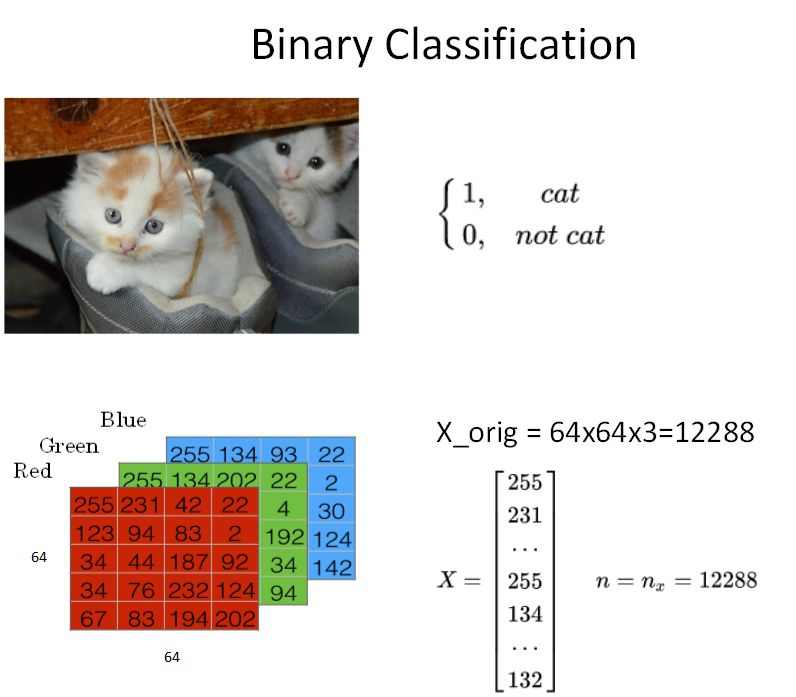

① 如上图所示，这是一个典型的二分类问题。

② 一般来说，彩色图片包含RGB三个通道。例如该cat图片的尺寸为（64，64，3）。

③ 在神经网络模型中，我们首先要将图片输入x（维度是（64，64，3））转化为一维的特征向量（feature vector）。

④ 方法是每个通道一行一行取，再连接起来。

⑤ 由于64x64x3=12288，则转化后的输入特征向量维度为（12288，1）。此特征向量X是列向量，维度一般记为$n_x$。

① 如果训练样本共有m张图片，那么整个训练样本X组成了矩阵，维度是（$n_x$，m）。注意，这里矩阵X的行$n_{x}$代表了每个样本x(i)特征个数，列m代表了样本个数。

② 这里，Andrew解释了X的维度之所以是（$n_x$，m）而不是（m，$n_x$）的原因是为了之后矩阵运算的方便。算是Andrew给我们的一个小小的经验吧。

③ 而所有训练样本的输出Y也组成了一维的行向量，写成矩阵的形式后，它的维度就是（1，m）。

# 2. 逻辑回归预测值

① 接下来我们就来介绍如何使用逻辑回归来解决二分类问题。

② 逻辑回归中，预测值h^=P(y=1 | x)表示为1的概率，取值范围在[0,1]之间。

③ 这是其与二分类模型不同的地方。逻辑回归的预测值为一个连续的概率。

④ 使用线性模型，引入参数w和b。权重w的维度是（$n_x$，1），b是一个常数项。这样，逻辑回归的线性预测输出可以写成：

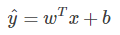

① 值得注意的是，很多其它机器学习资料中，可能把常数b当做$w_0$处理，并引入$x_{0}=1$。

② 这样从维度上来看，x和w都会增加一维。

③ 但在本课程中，为了简化计算和便于理解，Andrew建议还是使用上式这种形式将w和b分开比较好。

① 上式的线性输出区间为整个实数范围，而逻辑回归要求输出范围在[0,1]之间，所以还需要对上式的线性函数输出进行处理。

② 方法是引入Sigmoid函数，让输出限定在[0,1]之间。这样，逻辑回归的预测输出就可以完整写成：

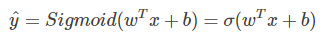

① Sigmoid函数是一种非线性的S型函数，输出被限定在[0,1]之间，通常被用在神经网络中当作激活函数（Activation function）使用。

② Sigmoid函数的表达式和曲线如下所示：

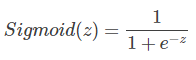

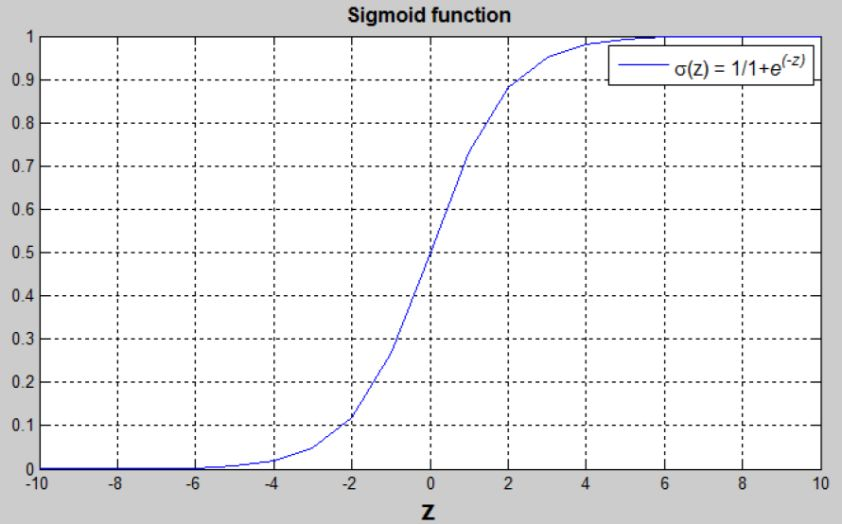

① 从Sigmoid函数曲线可以看出，当z值很大时，函数值趋向于1。

② 当z值很小时，函数值趋向于0。

③ 且当z=0时，函数值为0.5。

④ 还有一点值得注意的是，Sigmoid函数的一阶导数可以用其自身表示：

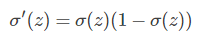

⑤ 这样，通过Sigmoid函数，就能够将逻辑回归的输出限定在[0,1]之间了。

# 3. 逻辑回归损失函数

① 逻辑回归中，w和b都是未知参数，需要反复训练优化得到。

② 因此，我们需要定义一个cost function，包含了参数w和b。

③ 通过优化cost function，当cost function取值最小时，得到对应的w和b。

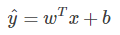

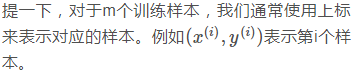

① 如何定义所有m个样本的cost function呢？先从单个样本出发，我们希望该样本的预测值y^与真实值越相似越好。

② 我们把单个样本的cost function用Loss function来表示，根据以往经验，使用平方误差（squared error）来衡量，如下所示：

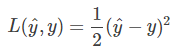

① 但是，对于逻辑回归，我们一般不使用平方误差来作为Loss function。原因是这种Loss function一般是non-convex的。

② non-convex函数在使用梯度下降算法时，容易得到局部最小值（local minumum），即局部最优化。

③ 而我们最优化的目标是计算得到全局最优化（Global optimization）。

④ 因此，我们一般选择的Loss function应该是convex的。

① Loss function的原则和目的就是要衡量预测输出y^与真实样本输出y的接近程度。

② 平方损失其实也可以，只是它是non-convex的，不利于使用梯度下降算法来进行全局优化。

③ 因此，我们可以构建另外一种Loss function，且是convex的，如下所示：

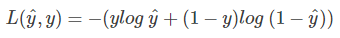

① 我们来分析一下这个Loss function，它是衡量错误大小的，Loss function越小越好。

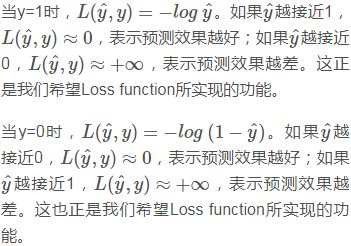

② y=1，输入特征向量X可以获得它的预测值y^，若它的预测值与1越接近，则损失越小。y=0，同理。

① 因此，这个Loss function能够很好地反映预测输出y^与真实样本输出y的接近程度，越接近的话，其Loss function值越小。而且这个函数是convex的。

② 上面我们只是简要地分析为什么要使用这个Loss function，后面的课程中，我们将详细推导该Loss function是如何得到的。并不是凭空捏造的哦。

① 还要提一点的是，上面介绍的Loss function是针对单个样本的。那对于m个样本，我们定义Cost function，Cost function是m个样本的Loss function的平均值，反映了m个样本的预测输出y^与真实样本输出y的平均接近程度。Cost function可表示为：

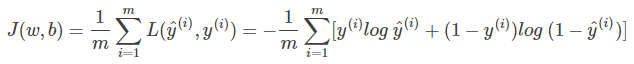

② Cost function已经推导出来了，Cost function是关于待求系数w和b的函数。

③ 我们的目标就是迭代计算出最佳的w和b值，最小化Cost function，让Cost function尽可能地接近于零。

④ 其实逻辑回归问题可以看成是一个简单的神经网络，只包含一个神经元。这也是我们这里先介绍逻辑回归的原因。

# 4. 梯度下降

① 我们已经掌握了Cost function的表达式，接下来将使用梯度下降（Gradient Descent）算法来计算出合适的w和b值，从而最小化m个训练样本的Cost function，即J(w,b)。

② 由于J(w,b)是convex function，梯度下降算法是先随机选择一组参数w和b值，然后每次迭代的过程中分别沿着w和b的梯度（偏导数）的反方向前进一小步，不断修正w和b。

③ 每次迭代更新w和b后，都能让J(w,b)更接近全局最小值。梯度下降的过程如下图所示。

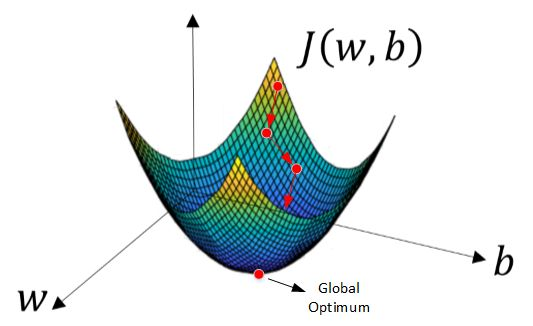

① 梯度下降算法每次迭代更新，w和b的修正表达式为：

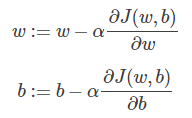

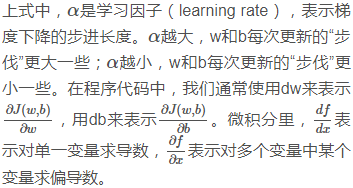

② 梯度下降算法能够保证每次迭代w和b都能向着J(w,b)全局最小化的方向进行。

③ 其数学原理主要是运用泰勒一阶展开来证明的。

# 5. 计算图

① 整个神经网络的训练过程实际上包含了两个过程：正向传播（Forward Propagation）和反向传播（Back Propagation）。

② 正向传播是从输入到输出，由神经网络计算得到预测输出的过程；反向传播是从输出到输入，对参数w和b计算梯度的过程。

③ 下面，我们用计算图（Computation graph）的形式来理解这两个过程。

① 举个简单的例子，假如Cost function为J(a,b,c)=3(a+bc)，包含a，b，c三个变量。

② 我们用u表示bc，v表示a+u，则J=3v。

③ 它的计算图可以写成如下图所示：

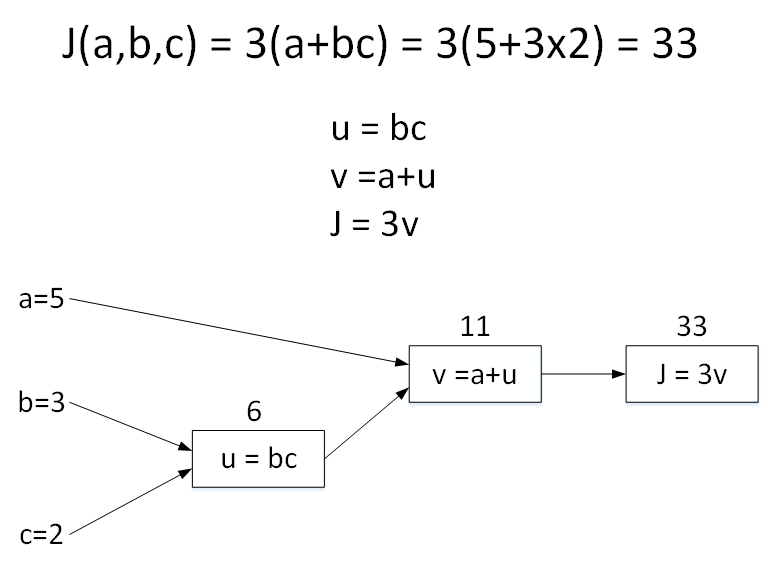

① 令a=5，b=3，c=2，则u=bc=6，v=a+u=11，J=3v=33。

② 计算图中，这种从左到右，从输入到输出的过程就对应着神经网络或者逻辑回归中输入与权重经过运算计算得到Cost function的正向过程。

# 6. 计算图中导数

① 上一部分介绍的是计算图的正向传播（Forward Propagation），下面我们来介绍其反向传播（Back Propagation），即计算输出对输入的偏导数。

② 还是上个计算图的例子，输入参数有3个，分别是a，b，c。

③ 首先计算J对参数a的偏导数。从计算图上来看，从右到左，J是v的函数，v是a的函数。则利用求导技巧，可以得到：

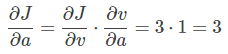

④ 根据这种思想，然后计算J对参数b的偏导数。从计算图上来看，从右到左，J是v的函数，v是u的函数，u是b的函数。可以推导：

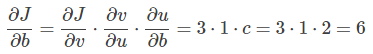

⑤ 最后计算J对参数c的偏导数。仍从计算图上来看，从右到左，J是v的函数，v是u的函数，u是c的函数。可以推导：

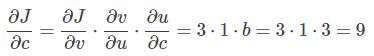

⑥ 为了统一格式，在程序代码中，我们使用da，db，dc来表示J对参数a，b，c的偏导数。

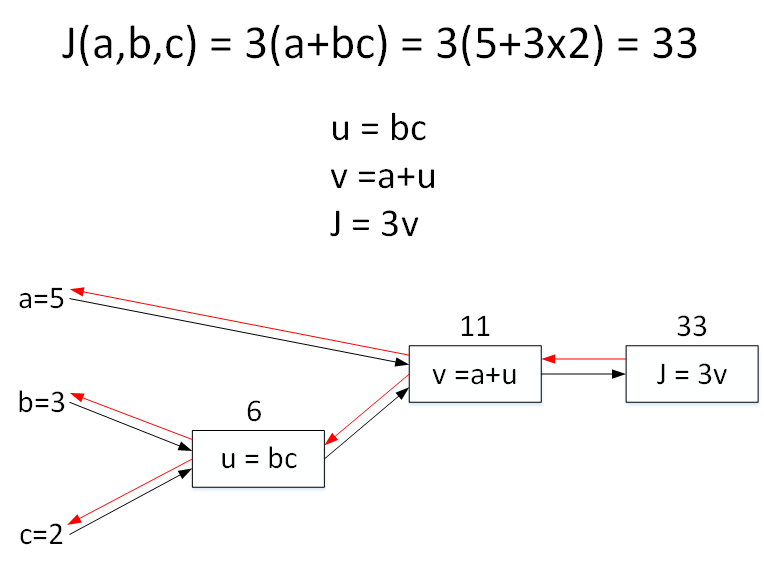

# 7. 逻辑回归梯度下降

① 现在，我们将对逻辑回归进行梯度计算。

② 对单个样本而言，逻辑回归Loss function表达式如下：

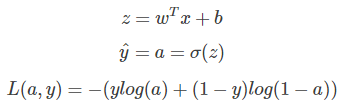

① 首先，该逻辑回归的正向传播过程非常简单。

② 根据上述公式，例如输入样本x有两个特征(x1,x2)，相应的权重w维度也是2，即(w1,w2)。

③ 则z=w1x1+w2x2+b，最后的Loss function如下所示：

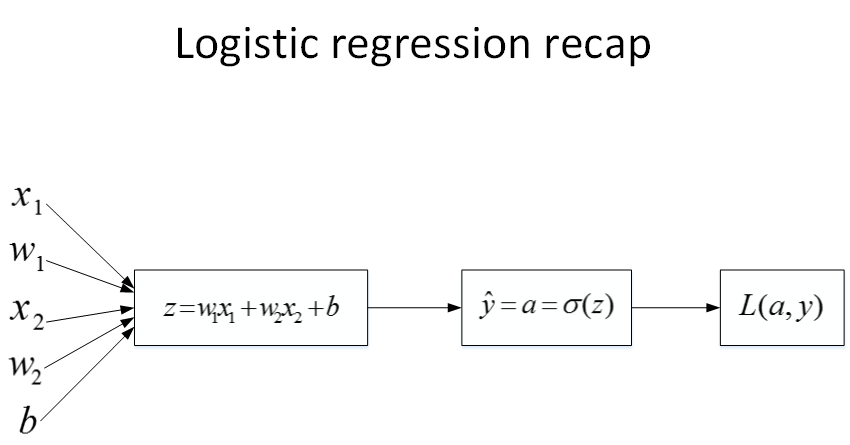

④ 然后，计算该逻辑回归的反向传播过程，即由Loss function计算参数w和b的偏导数。

⑤ 推导过程如下：

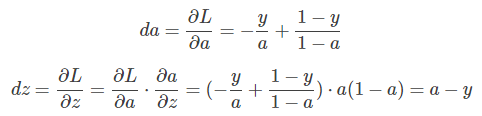

⑥ 知道了dz之后，就可以直接对w1，w2和b进行求导了。

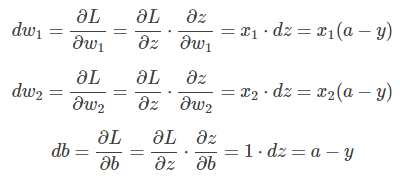

⑦ 则梯度下降算法可表示为：

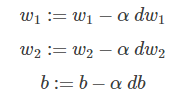

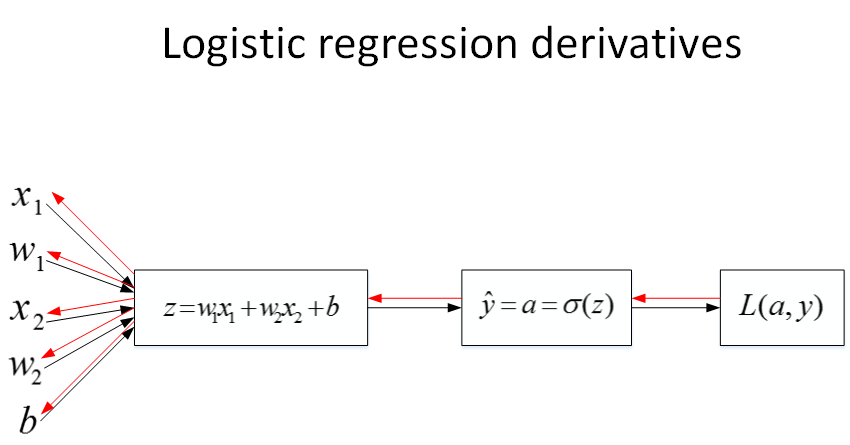

# 8. m个样本梯度下降

① 上一部分讲的是对单个样本求偏导和梯度下降。如果有m个样本，其Cost function表达式如下：

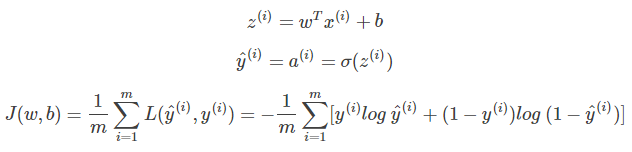

② Cost function关于w和b的偏导数可以写成和平均的形式：

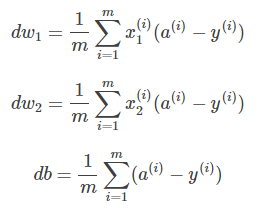

③ 这样，每次迭代中w和b的梯度有m个训练样本计算平均值得到。其算法流程图如下所示：

In [ ]:
J=0; dw1=0; dw2=0; db=0;
for i =1 to m
    z(i) = wx(i)+b;
    a(i) = sigmoid(z(i));
    J += -[y(i)log(a(i))+(1-y(i))log(1-a(i))];
    dz(i) = a(i)-y(i);
    dw1 += x1(i)dz(i);
    dw2 += x2(i)dz(i);
    db += dz(i);
J /= m;
dw1 /= m;
dw2 /= m;
db /= m;

④ 经过每次迭代后，根据梯度下降算法，w和b都进行更新：

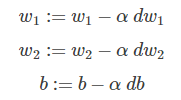

⑤ 这样经过n次迭代后，整个梯度下降算法就完成了。

① 值得一提的是，在上述的梯度下降算法中，我们是利用for循环对每个样本进行dw1，dw2和db的累加计算最后再求平均数的。

② 在深度学习中，样本数量m通常很大，使用for循环会让神经网络程序运行得很慢。

③ 所以，我们应该尽量避免使用for循环操作，而使用矩阵运算，能够大大提高程序运行速度。

④ 关于vectorization的内容我们放在下次笔记中再说。

# 9. 总结

① 本节课的内容比较简单，主要介绍了神经网络的基础——逻辑回归。

② 首先，我们介绍了二分类问题，以图片为例，将多维输入x转化为feature vector，输出y只有{0,1}两个离散值。

③ 接着，我们介绍了逻辑回归及其对应的Cost function形式。

④ 然后，我们介绍了梯度下降算法，并使用计算图的方式来讲述神经网络的正向传播和反向传播两个过程。

⑤ 最后，我们在逻辑回归中使用梯度下降算法，总结出最优化参数w和b的算法流程。